In [1]:

from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import os
import seaborn as sns
%matplotlib inline



In [2]:
#"C:\Users\ckent\Desktop\utDataAnalytics\pyber\Resources\city_data.csv"

ride_data_path = os.path.join("..","Pyber","Resources","ride_data.csv")
city_data_path = os.path.join("..","Pyber","Resources","city_data.csv")

ride_data = pd.read_csv(ride_data_path)
city_data = pd.read_csv(city_data_path)




In [3]:
ride_data.head()




,city,date,fare,ride_id
0,Sarabury,1/16/2016 13:49,38.35,5.403690e+12
1,South Roy,1/2/2016 18:42,17.49,4.036270e+12
2,Wiseborough,1/21/2016 17:35,44.18,3.645040e+12
3,Spencertown,7/31/2016 14:53,6.87,2.242600e+12
4,Nguyenbury,7/9/2016 4:42,6.28,1.543060e+12


In [4]:
#find duplicate values creating "ValueError: cannot reindex from a duplicate axis" error
#after merging tables below:

#city_data['city'].value_counts()



In [5]:
#remove duplicate value

city_data = city_data.drop_duplicates('city',keep = 'first')


In [6]:
#combine data sets on column "city"

pyber_df = city_data.merge(ride_data, on='city')

pyber_df.head()





,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,8/19/2016 4:27,5.51,6.246010e+12
1,Kelseyland,63,Urban,4/17/2016 6:59,5.54,7.466470e+12
2,Kelseyland,63,Urban,5/4/2016 15:06,30.54,2.140500e+12
3,Kelseyland,63,Urban,1/25/2016 20:44,12.08,1.896990e+12
4,Kelseyland,63,Urban,8/9/2016 18:19,17.91,8.784210e+12


RIDE SHARING GROUP CALCULATIONS

In [60]:
avg_fare = pyber_df.groupby('city')['fare'].mean()

num_rides_city = pyber_df.groupby('city')['ride_id'].count()

num_drivers_city = pyber_df.groupby('city')['driver_count'].first()

city_type = pyber_df.groupby('city')['type'].first()

tot_fare_city = pyber_df.groupby('city')['fare'].sum()


data_calculated = pd.DataFrame({"fare":avg_fare,
                               "rides":num_rides_city,
                               "drivers":num_drivers_city,
                               "type":city_type,
                               "total fare":tot_fare_city
                               })

data_calculated.head()




,drivers,fare,rides,total fare,type
city,,,,,
Alvarezhaven,21,23.928710,31,741.79,Urban
Alyssaberg,67,20.609615,26,535.85,Urban
Anitamouth,16,37.315556,9,335.84,Suburban
Antoniomouth,21,23.625000,22,519.75,Urban
Aprilchester,49,21.981579,19,417.65,Urban


BUBBLE PLOT OF RIDE SHARING DATA


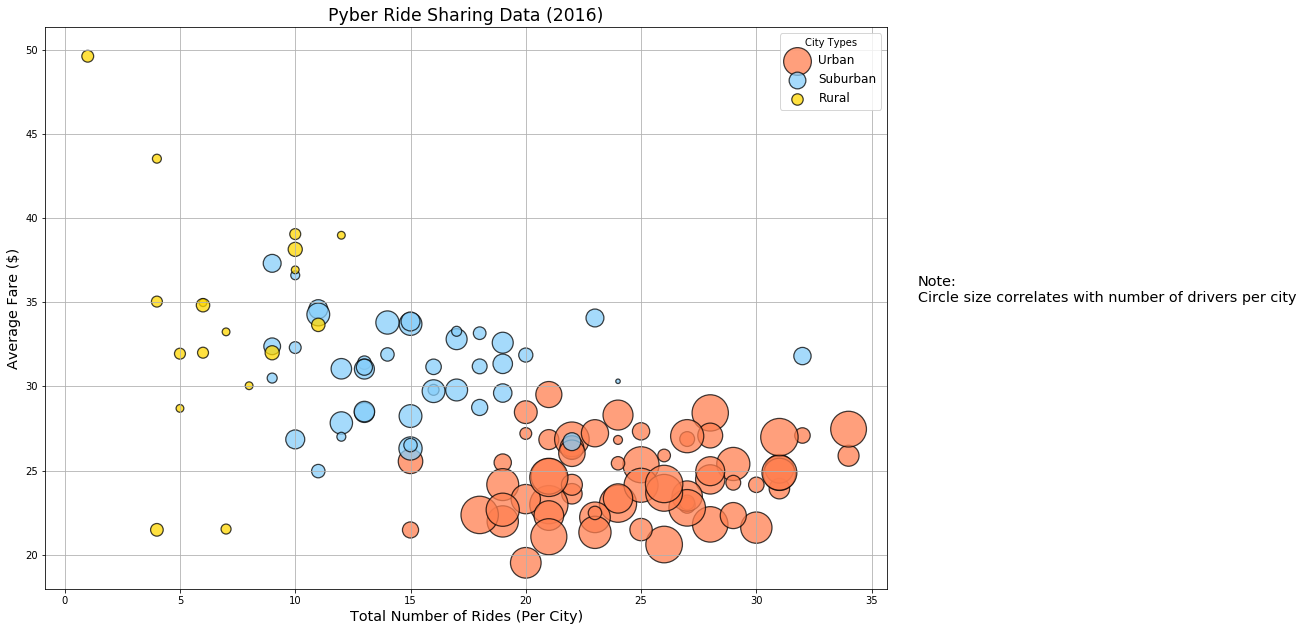

In [79]:
urban = data_calculated[data_calculated['type'] == "Urban"]
suburban = data_calculated[data_calculated['type'] == "Suburban"]
rural = data_calculated[data_calculated['type'] == "Rural"]
plt.axes([1.025,1.025,1.95,1.95])


plt.scatter(urban['rides'],urban["fare"], color = 'Coral', edgecolors = 'black', s = urban['drivers']*20,
            label = 'Urban', alpha = .75, linewidths=1.25)
plt.scatter(suburban['rides'],suburban["fare"], color = 'LightSkyBlue', edgecolors = 'black', s = suburban['drivers']*20,
           label = 'Suburban', alpha = .75, linewidths=1.25)
plt.scatter(rural['rides'],rural["fare"], color = 'Gold', edgecolors = 'black', s = rural['drivers']*20, 
             label = 'Rural', alpha = .75, linewidths=1.25)

plt.legend(loc = 'upper right', fontsize = 'large', title="City Types",)
plt.title("Pyber Ride Sharing Data (2016)", fontsize = 'xx-large')
plt.ylabel("Average Fare ($)", fontsize = 'x-large')
plt.xlabel("Total Number of Rides (Per City)", fontsize = 'x-large')
plt.text(37,35,"Note:\nCircle size correlates with number of drivers per city", fontsize = 'x-large')


plt.grid()
plt.show()

GROUP BY CITY TYPE

In [68]:
city_type_sorted = data_calculated.groupby('type')

city_type_df = pd.DataFrame()

city_type_df['Total Rides'] = city_type_sorted["rides"].sum()
city_type_df['Total Drivers'] = city_type_sorted["drivers"].sum()
city_type_df['Total Fare'] = city_type_sorted["total fare"].sum()
city_type_df.reset_index(inplace=True)
city_type_df.head()



,type,Total Rides,Total Drivers,Total Fare
0,Rural,125,104,4255.09
1,Suburban,625,635,19317.88
2,Urban,1625,2607,40078.34


TOTAL FARES BY CITY TYPE

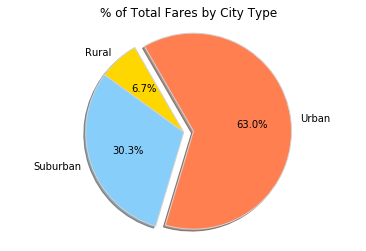

In [74]:
colors = {"Urban":"Coral","Suburban":"LightSkyBlue","Rural":"Gold"}

explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_df["explode"] = [explode_dict[x] for x in city_type_df["type"]]
city_type_df["colors"] = [colors[x] for x in city_type_df["type"]]

city_type_df.plot(kind="pie",y="Total Fare", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=city_type_df.explode,
                  colors=city_type_df.colors, labels=city_type_df.type, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Fares by City Type')

plt.show()

TOTAL RIDES BY CITY TYPE

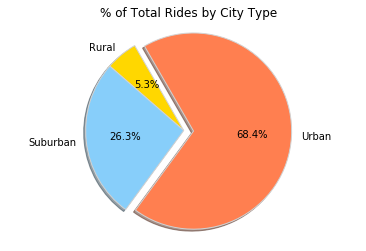

In [75]:
colors = {"Urban":"Coral","Suburban":"LightSkyBlue","Rural":"Gold"}

explode_dict = {"Urban":0.1,"Suburban":0,"Rural":0}
city_type_df["explode"] = [explode_dict[x] for x in city_type_df["type"]]
city_type_df["colors"] = [colors[x] for x in city_type_df["type"]]

city_type_df.plot(kind="pie",y="Total Rides", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=city_type_df.explode,
                  colors=city_type_df.colors, labels=city_type_df.type, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Rides by City Type')

plt.show()

TOTAL DRIVERS BY CITY TYPE

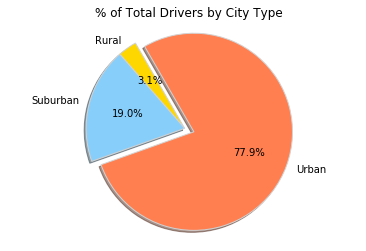

In [76]:
city_type_df["explode"] = [explode_dict[x] for x in city_type_df["type"]]
city_type_df["colors"] = [colors[x] for x in city_type_df["type"]]

city_type_df.plot(kind="pie",y="Total Drivers", autopct='%1.1f%%',
                  startangle=120, shadow=True, explode=city_type_df.explode,
                  colors=city_type_df.colors, labels=city_type_df.type, legend=False,
                  wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'lightgrey'}
                 )

plt.axis('off')
plt.axis('equal')

plt.title('% of Total Drivers by City Type')

plt.show()

OBSERVABLE TRENDS:
    1. Pyber is much more widely used in Urban areas.
    2. Rural and Suburban areas contribute a higher percentage of the total Pyber Fare revenue due to having fewer drivers 
    and higher relative fares per ride.
    3. Rural areas have more rides than drivers, creating a higher relative cost per ride.
    
    
    